<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/2020_10_09_Exercicio9_FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício 9
O arquivo FIFA.csv contem dados relacionados à última edição do FIFA 2018 (um dos jogos de video-game mais famosos) e traz os mais variados dados sobre os jogadores (exemplo): idade, nacionalidade, potencial, salário e etc. Faça o seguinte:

1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso);
2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
3. Qual o dtype de cada variável/atributo do dataframe?
4. Se alguma variávável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?
5. Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo;
6Há Missing values nos dados? Se sim, o qual sua proposta (proposta do grupo) para tratar estes Missing values?
7. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.
8. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality');
9. Qual a número de jogadores por idade?
10. Quantos jogadores possuem cada clube?
11. Qual a média de idade por clube?
12. Qual a média de salário por país?
13. Qual a média de salário por clube?
14. Qual a média de salário por idade?
15. Quanto cada clube gasta com pagamento de salários?
16. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?
17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?
18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?
19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.
20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?
21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?
22. Quem são os outliers em termos de salário?
23. Quem são os outliers em termos de potência no chute?





In [1]:
import pandas as pd

df_fifa = pd.read_csv('https://github.com/flavianacif/DSWP/blob/master/Dataframes/FIFA.csv?raw=true') ##Questão 1

In [2]:
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df_fifa[['Name','Club','Age','Value','Wage']].value_counts()

Name             Club                Age  Value  Wage
Óscar Whalley    Aarhus GF           24   €525K  €2K     1
G. MacKenzie     St. Mirren          32   €170K  €2K     1
G. Loiacono      Foggia              26   €400K  €1K     1
G. Long          Hull City           24   €725K  €6K     1
G. Loovens       Sunderland          34   €230K  €5K     1
                                                        ..
M. Rauschenberg  IF Brommapojkarna   26   €210K  €1K     1
M. Ratajczak     SC Paderborn 07     36   €50K   €1K     1
M. Rasner        SKN St. Pölten      23   €475K  €3K     1
M. Rasmussen     FC Nordsjælland     20   €525K  €3K     1
A. Abang         New York Red Bulls  21   €425K  €1K     1
Length: 17966, dtype: int64

In [4]:
df_fifa.shape

(18207, 89)

In [5]:
df_fifa['ID'].value_counts() ##Para ver se ID pode ser index

231423    1
225883    1
205393    1
244306    1
209491    1
         ..
244973    1
177388    1
199915    1
234728    1
198657    1
Name: ID, Length: 18207, dtype: int64

In [6]:
df_fifa_copy = df_fifa.set_index('ID')

In [7]:
df_fifa_copy.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
df_fifa_copy.columns = df_fifa_copy.columns.str.lower() ## Questão 5 

In [9]:
df_fifa_copy.dtypes ##Questão 4

unnamed: 0          int64
name               object
age                 int64
photo              object
nationality        object
                   ...   
gkhandling        float64
gkkicking         float64
gkpositioning     float64
gkreflexes        float64
release clause     object
Length: 88, dtype: object

In [10]:
df_fifa_copy['nationality'].value_counts() ##Questão 6

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
                       ... 
São Tomé & Príncipe       1
Kuwait                    1
Fiji                      1
Ethiopia                  1
Mauritius                 1
Name: nationality, Length: 164, dtype: int64

In [11]:
pd.DataFrame(df_fifa_copy.loc[:,'nationality'].value_counts()) ##Questão 6 - outra forma

,nationality
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
...,...
São Tomé & Príncipe,1
Kuwait,1
Fiji,1
Ethiopia,1


In [12]:
df_fifa_copy.groupby('nationality')['age'].mean() ##Questão 7

nationality
Afghanistan    22.500000
Albania        24.025000
Algeria        27.050000
Andorra        28.000000
Angola         25.866667
                 ...    
Uzbekistan     29.500000
Venezuela      24.313433
Wales          24.736434
Zambia         22.222222
Zimbabwe       26.846154
Name: age, Length: 164, dtype: float64

In [13]:
df_fifa_copy[['age','nationality']].groupby('nationality').mean() ##Questão 7 - outra forma

,age
nationality,
Afghanistan,22.500000
Albania,24.025000
Algeria,27.050000
Andorra,28.000000
Angola,25.866667
...,...
Uzbekistan,29.500000
Venezuela,24.313433
Wales,24.736434


In [14]:
df_fifa_copy['age'].value_counts() #Questão 8

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: age, dtype: int64

In [15]:
df_fifa_copy['club'].value_counts() #Questão 9

Valencia CF            33
TSG 1899 Hoffenheim    33
AS Monaco              33
FC Barcelona           33
Liverpool              33
                       ..
Fluminense             20
Cruzeiro               20
Sligo Rovers           19
Limerick FC            19
Derry City             18
Name: club, Length: 651, dtype: int64

In [16]:
df_fifa_copy['wage']

ID
158023    €565K
20801     €405K
190871    €290K
193080    €260K
192985    €355K
          ...  
238813      €1K
243165      €1K
241638      €1K
246268      €1K
246269      €1K
Name: wage, Length: 18207, dtype: object

In [17]:
pd.to_numeric(df_fifa_copy['wage'].str[1:-1])*1000 ##Questão 4

ID
158023    565000.0
20801     405000.0
190871    290000.0
193080    260000.0
192985    355000.0
            ...   
238813      1000.0
243165      1000.0
241638      1000.0
246268      1000.0
246269      1000.0
Name: wage, Length: 18207, dtype: float64

In [18]:
df_fifa_copy['wage'] = pd.to_numeric(df_fifa_copy['wage'].str[1:-1])*1000


In [19]:
df_fifa_copy['wage']

ID
158023    565000.0
20801     405000.0
190871    290000.0
193080    260000.0
192985    355000.0
            ...   
238813      1000.0
243165      1000.0
241638      1000.0
246268      1000.0
246269      1000.0
Name: wage, Length: 18207, dtype: float64

In [20]:
import numpy as np

In [21]:
df_fifa_copy['wage'][df_fifa_copy['wage'].isna()]


ID
207439   NaN
156713   NaN
229909   NaN
187347   NaN
187607   NaN
          ..
245164   NaN
243131   NaN
233526   NaN
236452   NaN
234508   NaN
Name: wage, Length: 241, dtype: float64

In [22]:
##df_fifa_copy['wage'][df_fifa_copy['wage'].isna()] = np.zeros(shape = df_fifa_copy['wage'][df_fifa_copy['wage'].isna()].shape)

In [23]:
##df_fifa_copy['wage']

In [24]:
df_fifa_copy.groupby('club').agg({'wage':['sum','mean'],'age':['mean','count']}) ##Questões 9, 10, 12 e 14

wage                      age      
                            sum          mean       mean count
club                                                          
 SSV Jahn Regensburg   123000.0   4241.379310  25.655172    29
1. FC Heidenheim 1846  125000.0   4464.285714  24.000000    28
1. FC Kaiserslautern    44000.0   1692.307692  23.846154    26
1. FC Köln             372000.0  13285.714286  24.321429    28
1. FC Magdeburg        127000.0   4884.615385  24.692308    26
...                         ...           ...        ...   ...
Zagłębie Sosnowiec      27000.0   1080.000000  26.240000    25
Çaykur Rizespor        193000.0   6433.333333  25.433333    30
Örebro SK               40000.0   1481.481481  24.037037    27
Östersunds FK           45000.0   2045.454545  23.863636    22
Śląsk Wrocław           51000.0   2040.000000  25.960000    25

[651 rows x 4 columns]

In [25]:
df_fifa_copy.groupby('age').agg({'wage':['mean','count']}) ##Questões 8 e 13

wage      
             mean count
age                    
16    1166.666667    42
17    2141.868512   289
18    2238.683128   729
19    2767.647059  1020
20    4786.525974  1232
21    6210.749646  1414
22    8031.131359  1317
23    8741.641337  1316
24   10053.103964  1337
25   11411.674347  1302
26   13202.512934  1353
27   13744.995648  1149
28   14201.112141  1079
29   14295.864263   943
30   13667.774086   903
31   16253.237410   695
32   14294.326241   564
33   13423.558897   399
34   10892.768080   401
35    7046.875000   192
36    5866.141732   127
37    7185.185185    81
38    5000.000000    36
39    4520.000000    25
40    9076.923077    13
41    2500.000000     4
42    1000.000000     1
44    1000.000000     2
45    8000.000000     1

In [26]:
df_fifa_copy.groupby('nationality').agg({'wage':['mean'],'age':['mean','count']}) ##Questões 6, 7 e 11

wage        age      
                     mean       mean count
nationality                               
Afghanistan   1250.000000  22.500000     4
Albania       7100.000000  24.025000    40
Algeria      18083.333333  27.050000    60
Andorra       1000.000000  28.000000     1
Angola        7666.666667  25.866667    15
...                   ...        ...   ...
Uzbekistan    9000.000000  29.500000     2
Venezuela     6916.666667  24.313433    67
Wales        12187.500000  24.736434   129
Zambia        3444.444444  22.222222     9
Zimbabwe      6846.153846  26.846154    13

[164 rows x 3 columns]

In [27]:
df_fifa_copy[['name','sprintspeed']].sort_values(by='sprintspeed',ascending=False,).head() ##Questão 19

,name,sprintspeed
ID,,
213956,Adama,96.0
222492,L. Sané,96.0
231747,K. Mbappé,96.0
216258,I. Bebou,95.0
173731,G. Bale,95.0


In [28]:
df_fifa_copy[['name','shotpower']].sort_values(by='shotpower',ascending=False,).head() ##Questão 20

,name,shotpower
ID,,
20801,Cristiano Ronaldo,95.0
189362,Hulk,94.0
169051,F. Guarín,93.0
150516,L. Podolski,92.0
173731,G. Bale,92.0


In [29]:
l_atrib = ['wage' , 'potential'] ## Questão 21 e 22
f_lim_inf = list()
f_lim_sup = list()
for atrib in l_atrib:
  a_outlier = np.array(df_fifa_copy[atrib][df_fifa_copy[atrib].notna()])
  f_q1 = np.percentile(a_outlier,25)
  f_q3 = np.percentile(a_outlier,75)
  f_iqr = f_q3 - f_q1
  f_lim_inf = f_q1 - 1.5 * f_iqr
  f_lim_sup = f_q3 + 1.5 * f_iqr
  print(f'Outiliers {atrib}: {df_fifa_copy[(df_fifa_copy[atrib] < f_lim_inf) | (df_fifa_copy[atrib] > f_lim_sup)]}')

Outiliers wage:         unnamed: 0               name  ...  gkreflexes release clause
ID                                     ...                           
158023           0           L. Messi  ...         8.0        €226.5M
20801            1  Cristiano Ronaldo  ...        11.0        €127.1M
190871           2          Neymar Jr  ...        11.0        €228.1M
193080           3             De Gea  ...        94.0        €138.6M
192985           4       K. De Bruyne  ...        13.0        €196.4M
...            ...                ...  ...         ...            ...
213642        8252          J. Wilson  ...        16.0            NaN
231856        8417      Álvaro Tejero  ...         7.0            NaN
245238        8732       Javi Sánchez  ...        13.0          €2.7M
225105        9141    Cristo González  ...        13.0          €2.6M
241467       10178    F. Feuillassier  ...         5.0          €3.2M

[2031 rows x 88 columns]
Outiliers potential:         unnamed: 0         

In [30]:
df_fifa_copy.groupby(['age','club','nationality'])['overall'].mean() ##Questão 16

age  club                 nationality      
16   AJ Auxerre           France               59.0
     AS Monaco            France               63.0
     Adelaide United      Australia            54.0
     Atlético Huila       Colombia             50.0
     Belgrano de Córdoba  Argentina            55.0
                                               ... 
41   Peterborough United  England              59.0
42   Nagoya Grampus       Japan                65.0
44   Accrington Stanley   Trinidad & Tobago    53.0
     Cambridge United     England              48.0
45   Pachuca              Mexico               71.0
Name: overall, Length: 12861, dtype: float64

In [31]:
##Questão 17
l_atrib = ['potential','overall']
for atrib in l_atrib:
  print(f"""
  Ranking por {atrib}: {df_fifa_copy.groupby('club')[atrib].max().sort_values(ascending = False)}
  """)


  Ranking por potential: club
Paris Saint-Germain    95
Juventus               94
FC Barcelona           94
Manchester United      93
Milan                  93
                       ..
Limerick FC            70
Bray Wanderers         70
Carlisle United        69
Cambridge United       69
Crawley Town           69
Name: potential, Length: 651, dtype: int64
  

  Ranking por overall: club
Juventus               94
FC Barcelona           94
Paris Saint-Germain    92
Manchester City        91
Chelsea                91
                       ..
Crewe Alexandra        64
Sligo Rovers           63
Limerick FC            62
Derry City             62
Bray Wanderers         58
Name: overall, Length: 651, dtype: int64
  


In [32]:
##Questão 18
for atrib in l_atrib:
  print(f"""
  Ranking por {atrib}: 
  {df_fifa_copy[['name',atrib]][df_fifa_copy['position'] == 'GK'].sort_values(by = atrib, ascending = False)}
  """)



  Ranking por potential: 
                   name  potential
ID                              
193080         De Gea         93
200389       J. Oblak         93
230621  G. Donnarumma         93
192448  M. ter Stegen         92
206585           Kepa         91
...               ...        ...
243110      Sun Qibin         52
243073  Teng Shangkun         51
211490    J. Miszczuk         50
237917      A. Suzuki         50
53748   K. Pilkington         48

[2025 rows x 2 columns]
  

  Ranking por overall: 
                   name  overall
ID                            
193080         De Gea       91
200389       J. Oblak       90
192448  M. ter Stegen       89
192119    T. Courtois       89
167495       M. Neuer       89
...               ...      ...
243158   L. Wahlstedt       48
221669       M. Hurst       48
53748   K. Pilkington       48
245862       J. Milli       47
242844     J. Livesey       47

[2025 rows x 2 columns]
  


Usando o dataframe FIFA, responda:

(1) Mostre o gráfico de barras com o número de jogadores por clube;

(2) Mostre o boxplot/histograma dos salários dos atletas para os clubes Real Madrid, Barcelona Paris Saint-Germain Bayern Munich e Juventus.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

Parte 1

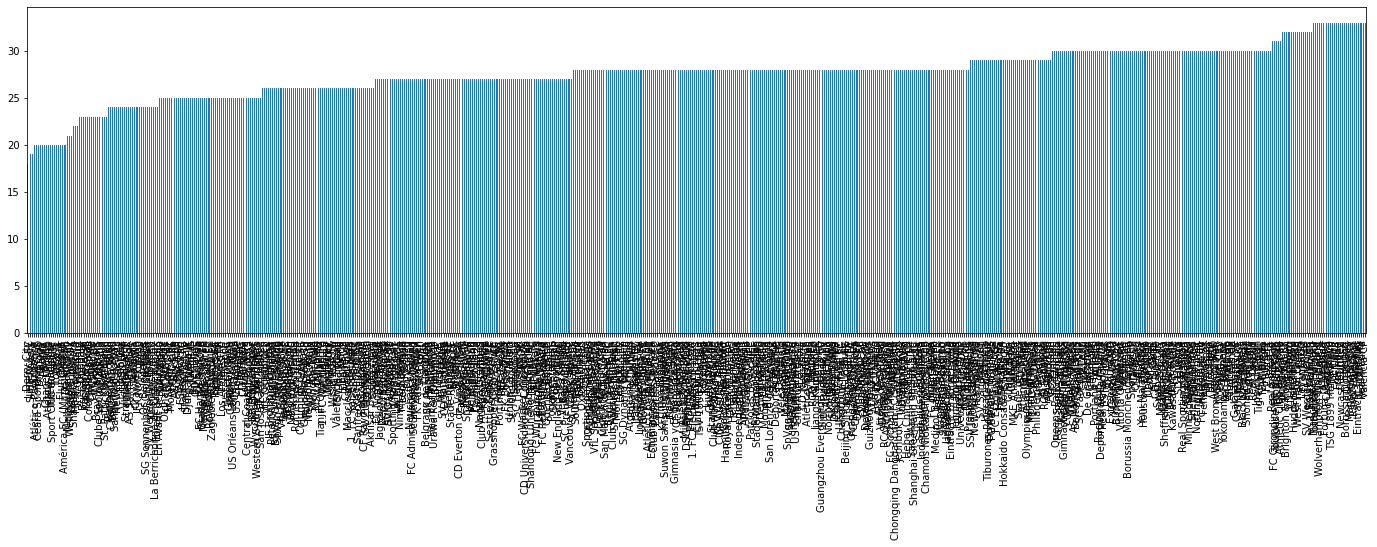

In [52]:
df_fifa_copy['club'].value_counts().sort_values().plot(kind = 'bar', stacked = True, figsize = (24,6))

Parte 2

In [39]:
df_fifa_copy[df_fifa_copy['club'].isin(['FC Barcelona','Real Madrid','FC Bayern München','Juventus','Paris Saint-Germain'])][['club','wage']]

,club,wage
ID,,
158023,FC Barcelona,565000.0
20801,Juventus,405000.0
190871,Paris Saint-Germain,290000.0
177003,Real Madrid,420000.0
176580,FC Barcelona,455000.0
...,...,...
245100,FC Bayern München,6000.0
246127,FC Bayern München,5000.0
246139,FC Barcelona,4000.0


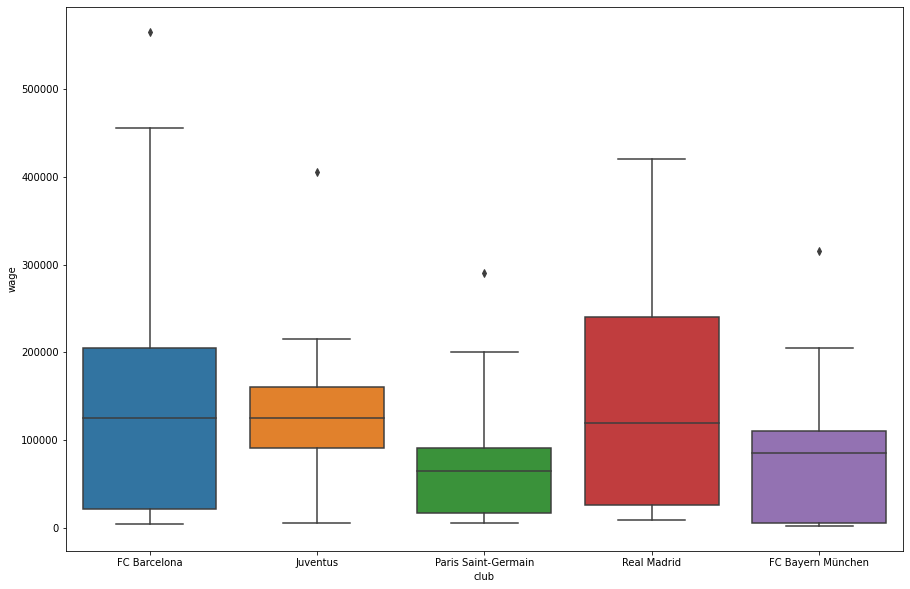

In [47]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
boxplot_salarios = df_fifa_copy[df_fifa_copy['club'].isin(['FC Barcelona','Real Madrid','FC Bayern München','Juventus','Paris Saint-Germain'])][['club','wage']]
sns.boxplot(x='club', y = 'wage', data = boxplot_salarios );

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d481cd9b0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

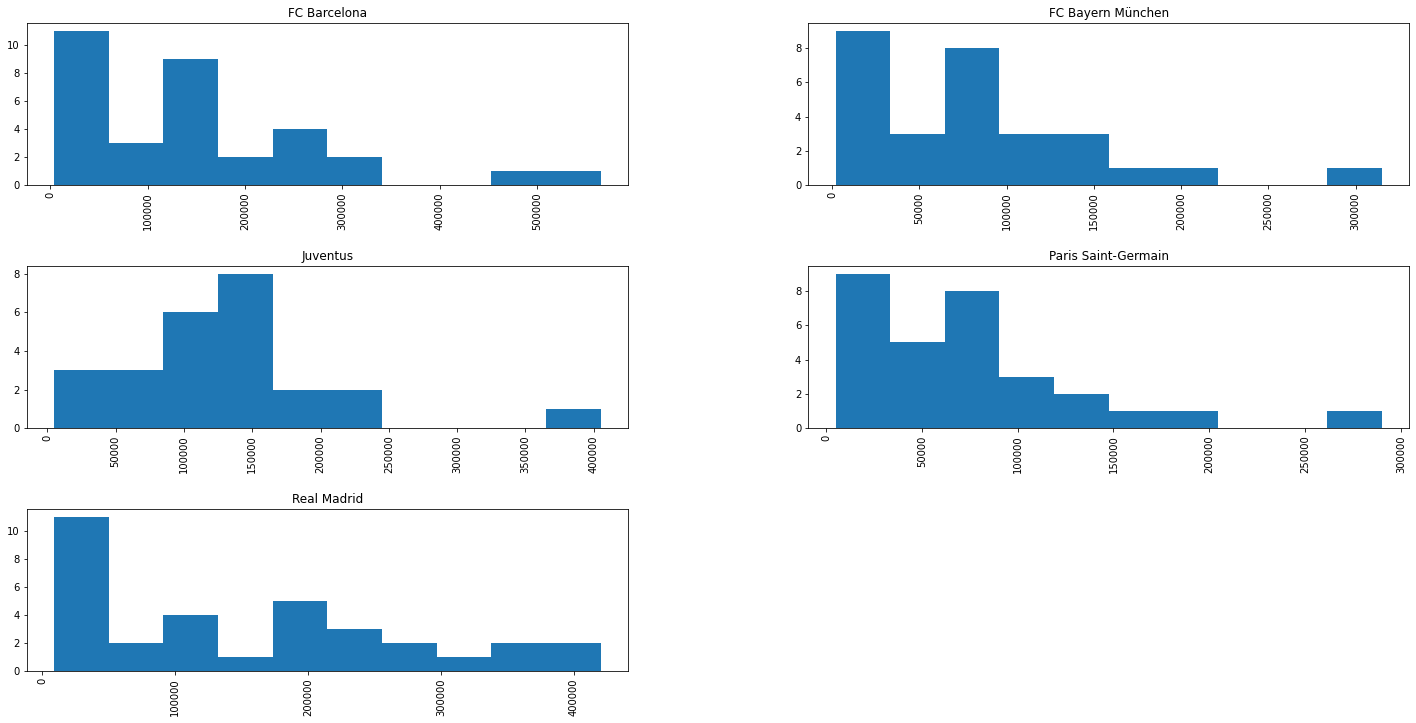

In [54]:
#fig, ax = plt.subplots(1, 1, figsize = (15,10))
#boxplot_salarios = df_fifa_copy[df_fifa_copy['club'].isin(['FC Barcelona','Real Madrid','FC Bayern München','Juventus','Paris Saint-Germain'])][['club','wage']]
#boxplot_salarios.plot(kind = 'hist', bins = 10)

plt.figure()
boxplot_salarios.hist(column = 'wage', by = 'club', figsize = (24,12))